<a href="https://colab.research.google.com/github/vickyck/AutomaticTicketAssignment_Capstone/blob/main/SIG742Task2_Combined_241005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIG742-Modern Data Science

### <font color = green> Student ID: <b>s224567848</b>  
### <font color = green> Name: <b> Balaji K</b>  
### <font color = green> Attempted High Distinction Question: <b>Yes</b>  
### <font color = green> Date of submission: <b>06-Oct-2024</b>

# ==========================================
# <font color= Blue>Part-I: Data Acquisition and Manipulation
# ==========================================

### <font color = red>Part 1: The first part will focus on the data manipulation and pyspark skills which includes the Data Acquisition, the Data Wrangling, the EDA and Spark, the modules and library from M03, M04.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import col
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
#
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import requests
import gzip
import shutil

url = 'https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz'  # Replace with the correct URL
response = requests.get(url)
with open('transactionrecord.gz', 'wb') as file:
    file.write(response.content)

# Step 2: Decompress the .gz file using gzip
with gzip.open('transactionrecord.gz', 'rb') as f_in:
    with open('transactionrecord', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("\033[1mDownloading of ZIP file and Extraction of contents from ZIP file has been completed!\033[0m")

### <font color = red>Question 1.1

**Using PySpark to do some of the data wrangling process, so that:**

**1.1.1 For the 'NA' in CustomerNo columns, change it to '-1'.**

**1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.**

### <font color = green>Answer 1.1

In [ ]:
spark = SparkSession.builder.appName("Data Acquisition and Manipulation").getOrCreate()
#
dfTxRecord_spark = spark.read.csv("transactionrecord", header=True, inferSchema=True)
#
dfTxRecord_spark.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

In [ ]:
print(f"\033[1mThe original pyspark dataframe has {dfTxRecord_spark.count()} rows and {len(dfTxRecord_spark.columns)} columns.\033[0m")

The original pyspark dataframe has 536350 rows and 9 columns.


In [ ]:
print(dfTxRecord_spark.columns)

['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Product_category', 'Price', 'Quantity', 'CustomerNo', 'Country']


**<font color = red>1.1.1 For the 'NA' in CustomerNo columns, change it to '-1'.**

In [ ]:
dfTxRecord_spark.printSchema()

root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
dfTxRecord_spark = dfTxRecord_spark.na.replace('NA', '-1', subset=['CustomerNo'])

**<font color = red>1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.**

In [ ]:
dfTxRecord_spark = dfTxRecord_spark.withColumn('productName_process', regexp_replace('ProductName', '[^A-Za-z\\s]', ''))
dfTxRecord_spark.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...|
|       581475|12/9/2019|    23239|Set Of 4 Knic

In [ ]:
print(f"\033[1mThe pyspark dataframe has {dfTxRecord_spark.count()} rows and {len(dfTxRecord_spark.columns)} columns \
after processing the text in 'productName' column.\033[0m")

The pyspark dataframe has 536350 rows and 10 columns after processing the text in 'productName' column.


In [ ]:
dfTxRecord_spark.printSchema()

root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- productName_process: string (nullable = true)



### <font color = red>Question 1.2

**Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:**

**1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.**

**1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.**

**1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?**

**<font color = red>1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.**

In [ ]:
dfTxRecord_spark = dfTxRecord_spark.withColumn("Revenue", (dfTxRecord_spark["Price"] * dfTxRecord_spark["Quantity"]).cast("float"))
print(f"\033[1mShowing only 'TransactionNo', 'Date', 'Price', 'Quantity', 'Revenue' columns\033[0m")
dfTxRecord_spark.select('TransactionNo', 'Date', 'Price', 'Quantity', 'Revenue').show(5)

Showing only 'TransactionNo', 'Date', 'Price', 'Quantity', 'Revenue' columns
+-------------+---------+-----+--------+-------+
|TransactionNo|     Date|Price|Quantity|Revenue|
+-------------+---------+-----+--------+-------+
|       581482|12/9/2019|21.47|      12| 257.64|
|       581475|12/9/2019|10.65|      36|  383.4|
|       581475|12/9/2019|11.53|      12| 138.36|
|       581475|12/9/2019|10.65|      12|  127.8|
|       581475|12/9/2019|11.94|       6|  71.64|
+-------------+---------+-----+--------+-------+
only showing top 5 rows



In [ ]:
print(f"The number of rows in pyspark dataframe = {dfTxRecord_spark.count()}")
print(f"The number of columns in pyspark dataframe = {len(dfTxRecord_spark.columns)}")

The number of rows in pyspark dataframe = 536350
The number of columns in pyspark dataframe = 11


**<font color = red>1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.**

In [ ]:
df = dfTxRecord_spark.toPandas()
df['transaction_date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09


In [ ]:
print(f"\033[1mThe Pandas dataframe has {df.shape[0]} rows and {df.shape[1]} columns\033[0m")

The Pandas dataframe has 536350 rows and 12 columns


**<font color = red>1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?**

In [ ]:
df_groupby_date = df.groupby('transaction_date')['Revenue'].sum().reset_index()
df_groupby_date.head()

,transaction_date,Revenue
0,2018-12-01,324649.218750
1,2018-12-02,260301.656250
2,2018-12-03,201975.187500
3,2018-12-05,196630.796875
4,2018-12-06,270656.875000


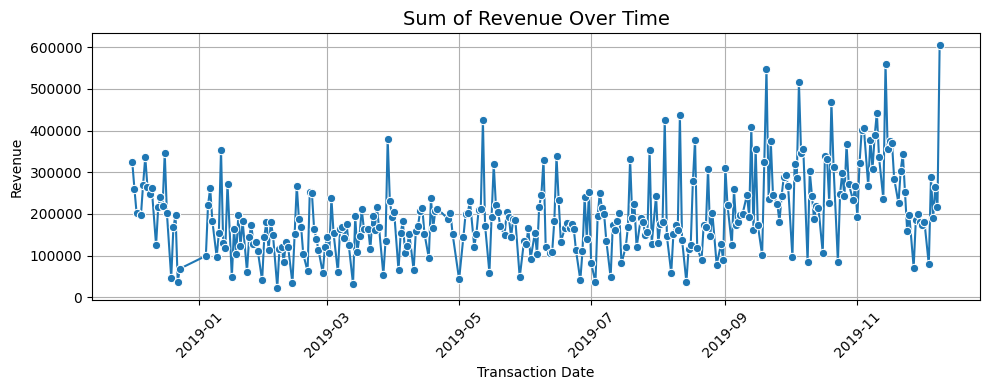

In [ ]:
plt.figure(figsize=(10, 4))
# plt.plot(df_groupby_date['transaction_date'], df_groupby_date['Revenue'], marker='o')
sns.lineplot(x='transaction_date', y='Revenue', data = df_groupby_date, marker="o")
plt.title('Sum of Revenue Over Time', fontsize=14)
plt.xlabel('Transaction Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights
- **Significant increase in revenue has been observed over the time and spikes show that these revenues are recorded on specific dates.**

- **As per the above graph, we can interpret that the Revenue is the maximum in the month: 2019-11 & minimum value was recorded in the month: 2019-01**

### <font color = red>Question 1.3

**Let’s continue to analyse on the transaction_date vs revenue.**


**1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues).**

**1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).**

**1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.**

**<font color = red>1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues).**

In [ ]:
df['workday'] = df['transaction_date'].dt.day_name()
avg_revenue_by_wd = df.groupby('workday')['Revenue'].mean().reset_index()

In [ ]:
avg_revenue_by_wd

,workday,Revenue
0,Friday,115.479759
1,Monday,119.241638
2,Saturday,117.389496
3,Sunday,127.947586
4,Thursday,101.541534
5,Wednesday,82.594635


In [ ]:
avg_revenue_by_wd['workday'] = pd.Categorical(avg_revenue_by_wd['workday'],
                                              categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                              ordered=True)
avg_revenue_by_wd = avg_revenue_by_wd.sort_values('workday')

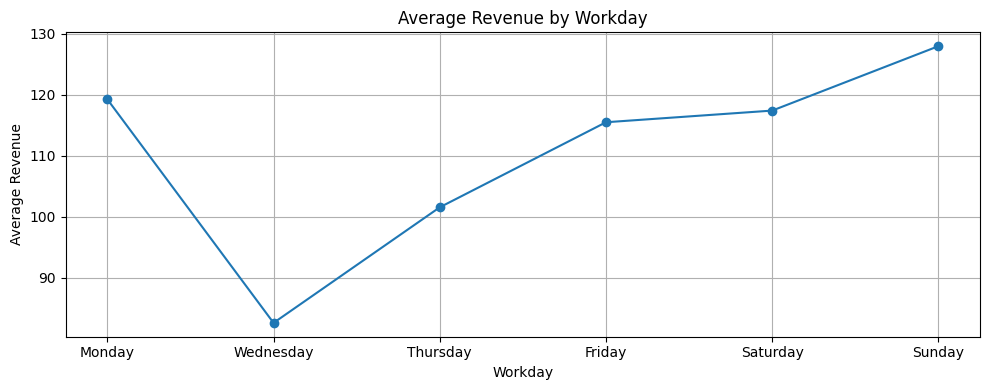

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(avg_revenue_by_wd['workday'], avg_revenue_by_wd['Revenue'], marker='o', linestyle='-')
plt.title('Average Revenue by Workday')
plt.xlabel('Workday')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
highest_avg_revenue_wd = avg_revenue_by_wd[avg_revenue_by_wd['Revenue'] == avg_revenue_by_wd['Revenue'].max()]['workday'].values[0]
print(f"\033[1mThe workday with highest average revenue is: {highest_avg_revenue_wd}\033[0m")

The workday with highest average revenue is: Sunday


**<font color = red>1.3.2 Identify the name of product (column 'productName_process') that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).**

In [ ]:
print("-"*100)
print(f"\033[1mCreating dataframe 'df_highest_avg_wd' for workday with highest average revenue ({highest_avg_revenue_wd}):\033[0m")
print("-"*100)
df_highest_avg_wd = df[df['workday'] == highest_avg_revenue_wd]
df_highest_avg_wd.head()

----------------------------------------------------------------------------------------------------
Creating dataframe 'df_highest_avg_wd' for workday with highest average revenue (Sunday):
----------------------------------------------------------------------------------------------------


,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday
1622,581214,12/8/2019,23494,Vintage Doily Deluxe Sewing Kit,0ca,6.19,12,14251,United Kingdom,Vintage Doily Deluxe Sewing Kit,74.279999,2019-12-08,Sunday
1623,581214,12/8/2019,22969,Homemade Jam Scented Candles,0ca,6.19,60,14251,United Kingdom,Homemade Jam Scented Candles,371.399994,2019-12-08,Sunday
1624,581214,12/8/2019,22910,Paper Chain Kit Vintage Christmas,0ca,6.19,40,14251,United Kingdom,Paper Chain Kit Vintage Christmas,247.600006,2019-12-08,Sunday
1625,581214,12/8/2019,22734,Set Of 6 Ribbons Vintage Christmas,0ca,6.19,12,14251,United Kingdom,Set Of Ribbons Vintage Christmas,74.279999,2019-12-08,Sunday
1626,581214,12/8/2019,22621,Traditional Knitting Nancy,0ca,6.19,12,14251,United Kingdom,Traditional Knitting Nancy,74.279999,2019-12-08,Sunday


In [ ]:
product_revenue_wd = df_highest_avg_wd.groupby('productName_process')['Revenue'].sum().reset_index()
product_revenue_wd.sort_values(by = 'Revenue', ascending=False)
product_revenue_wd.head()

,productName_process,Revenue
0,Bendy Skull Straws,668.739990
1,Black Petit Four Cases,117.480003
2,Blue Dinner Candles Silver Flock,115.740005
3,Burgundy Wine Dinner Candles,34.590000
4,Cake Cases Dolly Girl Design,20145.660156


In [ ]:
top_revenue_product_wd = \
product_revenue_wd[product_revenue_wd['Revenue'] == product_revenue_wd['Revenue'].max()]['productName_process'].values[0]
print(f"\033[1m Name of product that contributes to the highest revenue \
on the workday with highest average revenue is: '{top_revenue_product_wd}'")

 Name of product that contributes to the highest revenue on the workday with highest average revenue is: 'World War  Gliders Asstd Designs'


**<font color = red>1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.**

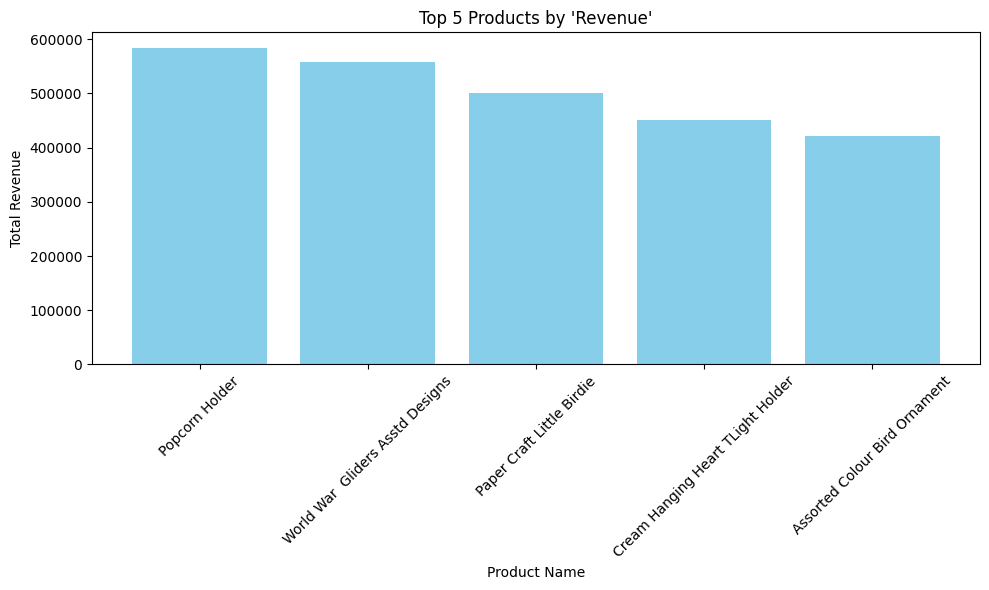

In [ ]:
products_by_revenue = df.groupby('productName_process')['Revenue'].sum().reset_index()
top_5_product_by_revenue = products_by_revenue.sort_values(by='Revenue', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_product_by_revenue['productName_process'], top_5_product_by_revenue['Revenue'], color='skyblue')
plt.title("Top 5 Products by 'Revenue'")
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

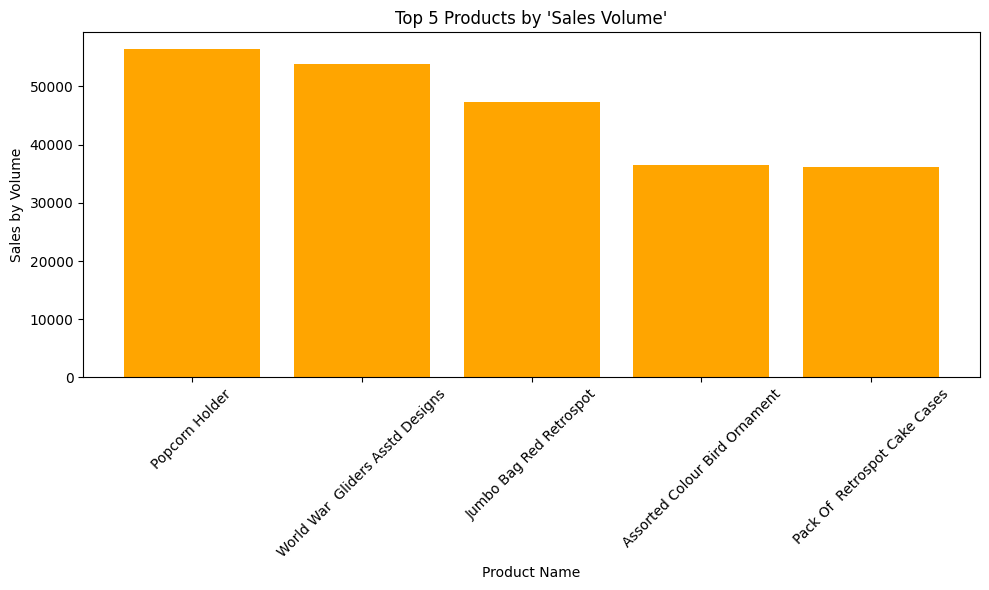

In [ ]:
products_by_sales = df.groupby('productName_process')['Quantity'].sum().reset_index()
top_5_product_by_sales = products_by_sales.sort_values(by='Quantity', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_product_by_sales['productName_process'], top_5_product_by_sales['Quantity'], color='orange')
plt.title("Top 5 Products by 'Sales Volume'")
plt.xlabel('Product Name')
plt.ylabel('Sales by Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = red>Question 1.4 Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.

In [ ]:
countries_by_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
countries_by_revenue.head()

,Country,Revenue
0,United Kingdom,4.999403e+07
1,Netherlands,2.147812e+06
2,EIRE,1.660645e+06
3,Germany,1.350265e+06
4,France,1.316881e+06


In [ ]:
top_country_by_revenue = countries_by_revenue.iloc[0]['Country']
print(f"\033[1mThe country that generates the highest revenue is: {top_country_by_revenue}\033[0m")

The country that generates the highest revenue is: United Kingdom


In [ ]:
df_top_country_by_revenue = df[df['Country'] == top_country_by_revenue].copy()
df_top_country_by_revenue.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
df_top_country_by_revenue = df[df['Country'] == top_country_by_revenue].copy()
df_top_country_by_revenue.loc[:, 'month'] = df_top_country_by_revenue['transaction_date'].dt.strftime('%B')
df_top_country_by_revenue.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday,December
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday,December
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday,December
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09,Monday,December
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday,December


In [ ]:
df_top_country_monthly_revenue = df_top_country_by_revenue.groupby('month')['Revenue'].sum().sort_values(ascending = False).reset_index()
df_top_country_monthly_revenue.head()

,month,Revenue
0,November,6737640.0
1,October,5632406.5
2,September,5480320.5
3,December,5458788.0
4,July,3765558.0


In [ ]:
top_country_highest_month_by_revenue = df_top_country_monthly_revenue.iloc[0]['month']
top_country_highest_month_by_revenue
print(f"\033[1mThe country that generates the highest revenue is: '{top_country_by_revenue}' \
and the the month of highest revenue for this country is: '{top_country_highest_month_by_revenue}' \033[0m")

The country that generates the highest revenue is: 'United Kingdom' and the the month of highest revenue for this country is: 'November' 


### <font color = red>Question 1.5. Let’s do some analysis on the CustomerNo and their transactions.

#### <font color = red>Determine the shopping frequency of customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0).

In [ ]:
df_shopping = df[df['Quantity'] > 0].copy()
customer_shopping_frequency = df_shopping.groupby('CustomerNo')['TransactionNo'].nunique().reset_index()
customer_shopping_frequency = customer_shopping_frequency.sort_values(by='TransactionNo', ascending=False).reset_index(drop=True)
customer_shopping_frequency.head()

,CustomerNo,TransactionNo
0,12748,207
1,14911,198
2,17841,125
3,13089,98
4,15311,91


In [ ]:
most_frequent_customer = customer_shopping_frequency.iloc[0]['CustomerNo']
print(f"\033[1mThe customer who shops most frequently is 'Customer No: {most_frequent_customer}'\033[0m")

The customer who shops most frequently is 'Customer No: 12748'


#### <font color = red>Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [ ]:
df_most_frequent_customer = df_shopping[df_shopping['CustomerNo'] == most_frequent_customer]
df_most_frequent_customer.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday
1540,581580,12/9/2019,23334,Ivory Wicker Heart Small,0ca,7.24,4,12748,United Kingdom,Ivory Wicker Heart Small,28.959999,2019-12-09,Monday
1541,581580,12/9/2019,21790,Vintage Snap Cards,0ca,7.24,1,12748,United Kingdom,Vintage Snap Cards,7.240000,2019-12-09,Monday
1542,581580,12/9/2019,84993A,75 Green Petit Four Cases,0ca,7.24,2,12748,United Kingdom,Green Petit Four Cases,14.480000,2019-12-09,Monday
1543,581580,12/9/2019,22906,12 Message Cards With Envelopes,0ca,7.24,1,12748,United Kingdom,Message Cards With Envelopes,7.240000,2019-12-09,Monday
1544,581580,12/9/2019,21803,Christmas Tree Star Decoration,0ca,7.24,2,12748,United Kingdom,Christmas Tree Star Decoration,14.480000,2019-12-09,Monday


In [ ]:
products_most_frequent_customer_buys = df_most_frequent_customer.groupby('productName_process')['Quantity'].sum().reset_index()
products_most_frequent_customer_buys = products_most_frequent_customer_buys.sort_values(by='Quantity', ascending=False)
print("-"*140)
print(f"\033[1mThe top 10 products that 'most frequent customer' typically buys based on the Quantity of products purchased are\033[0m")
print("-"*140)
products_most_frequent_customer_buys.head(10)

--------------------------------------------------------------------------------------------------------------------------------------------
The top 10 products that 'most frequent customer' typically buys based on the Quantity of products purchased are
--------------------------------------------------------------------------------------------------------------------------------------------


,productName_process,Quantity
1611,Victorian Metal Postcard Spring,595
1706,World War Gliders Asstd Designs,480
1285,Rose Scent Candle Jewelled Drawer,408
252,Cartoon Pencil Sharpeners,405
1493,Small White Retrospot Mug In Box,390
1610,Vanilla Scent Candle Jewelled Box,380
1490,Small Red Retrospot Mug In Box,372
216,Bubblegum Ring Assorted,318
1151,Popart Wooden Pencils Asst,300
960,Ocean Scent Candle In Jewelled Box,225


### <font color = red>Question 1.6. As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:

**<font color = red>1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.**

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09,Monday
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday


In [ ]:
df_filtered = df[df['Quantity'] > 0].copy()

df_basket_analysis = df_filtered.groupby('TransactionNo').agg({
    'Product_category': list,
    'productName_process': list
}).reset_index()

df_basket_analysis.head(10)

,TransactionNo,Product_category,productName_process
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro..."
1,536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro..."
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou..."
3,536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris..."
4,536369,[0ca],[Bath Building Block Word]
5,536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Alarm Clock Bakelike Pink, Alarm Clock Bakeli..."
6,536371,[0ca],[Paper Chain Kit S Christmas]
7,536372,"[0ca, 0ca]","[Hand Warmer Red Retrospot, Hand Warmer Union ..."
8,536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Cream Hanging Heart TLight Holder, White Moro..."
9,536374,[0ca],[Victorian Sewing Box Large]


**<font color = red>1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.**

In [ ]:
def remove_adjacent_duplicates(lst):
    return [v for i, v in enumerate(lst) if i == 0 or lst[i] != lst[i-1]]

df_basket_analysis['Product_category'] = df_basket_analysis['Product_category'].apply(remove_adjacent_duplicates)

df_1 = df_basket_analysis.copy()

df_1.head(10)

,TransactionNo,Product_category,productName_process
0,536365,[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."
1,536366,[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro..."
2,536367,[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou..."
3,536368,[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris..."
4,536369,[0ca],[Bath Building Block Word]
5,536370,[0ca],"[Alarm Clock Bakelike Pink, Alarm Clock Bakeli..."
6,536371,[0ca],[Paper Chain Kit S Christmas]
7,536372,[0ca],"[Hand Warmer Red Retrospot, Hand Warmer Union ..."
8,536373,[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."
9,536374,[0ca],[Victorian Sewing Box Large]


### <font color = red>Question 1.7. Continue work on the results of question 1.6, now for each of the transaction, you will have a list of product categories. To further conduct the analysis, you need to finish below by using dataframe ‘df_1’:

**<font color = red>1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.**

In [ ]:
df_1['prod_len'] = df_1['Product_category'].apply(len)
df_1.head(5)

,TransactionNo,Product_category,productName_process,prod_len
0,536365,[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",1
1,536366,[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro...",1
2,536367,[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou...",1
3,536368,[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris...",1
4,536369,[0ca],[Bath Building Block Word],1


**<font color = red>1.7.2 Transform the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also you need to use ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >). The final format after the transition is given in example as below fig. 2. Define the function data_processing to achieve above with three arguments: df which is the dataframe name, maxlength with default value of 3 for filtering the dataframe with prod_len" <=maxlength and minlength with default value of 1 for filtering the dataframe with prod_len >=minlength. The function data_processing will return the new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, print the dataframe ‘df_2’ with top 10 rows.**

![image.png](attachment:f8f9e3ba-2626-4999-9861-8b649a4324ea.png)

In [ ]:
def data_processing(df, maxlength=3, minlength=1):
    df['path'] = df['Product_category'].apply(lambda x: 'start > ' + ' > '.join(x) + ' > conversion')
    df_filtered = df[(df['prod_len'] >= minlength) & (df['prod_len'] <= maxlength)]
    return df_filtered

In [ ]:
df_2 = data_processing(df_1, maxlength=5, minlength=2)
df_2.head(10)

,TransactionNo,Product_category,productName_process,prod_len,path
13,536378,"[0ca, 1ca, 0ca]","[Strawberry Charlotte Bag, Childrens Cutlery R...",3,start > 0ca > 1ca > 0ca > conversion
27,536395,"[0ca, 1ca, 0ca]","[Black Heart Card Holder, Assorted Colour Bird...",3,start > 0ca > 1ca > 0ca > conversion
36,536404,"[0ca, 1ca, 0ca, 4ca, 0ca]","[Heart Ivory Trellis Small, Clear Drawer Knob ...",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion
40,536408,"[0ca, 1ca, 0ca]","[Magic Drawing Slate Dinosaur, Magic Drawing S...",3,start > 0ca > 1ca > 0ca > conversion
42,536412,"[0ca, 4ca, 0ca]","[Round Snack Boxes Set Of Woodland, Round Snac...",3,start > 0ca > 4ca > 0ca > conversion
43,536415,"[0ca, 1ca, 0ca]","[ Cake Cases Vintage Christmas, Paper Chain Ki...",3,start > 0ca > 1ca > 0ca > conversion
52,536464,"[0ca, 1ca, 0ca]","[Black Sweetheart Bracelet, Diamante Hair Grip...",3,start > 0ca > 1ca > 0ca > conversion
72,536532,"[0ca, 1ca, 0ca]","[Box Of Cocktail Parasols, Grow Your Own Plan...",3,start > 0ca > 1ca > 0ca > conversion
82,536542,"[0ca, 4ca]","[Recycling Bag Retrospot, Jumbo Storage Bag Sk...",2,start > 0ca > 4ca > conversion
83,536544,"[0ca, 1ca, 0ca, 4ca, 0ca]","[Decorative Rose Bathroom Bottle, Decorative C...",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion


#### Explanation:
- **Find Length: Calculate the length of each Product_Category list and store it in a new column prod_len.**

- **Filter DataFrame: We filter the DataFrame to include only those rows where the length of Product_Category is between minlength and maxlength.**

- **Transform List to Path: We transform each Product_Category list into a string path starting with 'start' and ending with 'conversion', with each category separated by ' > '.**

- **Drop Unnecessary Column: We drop the Prod_Len column since it is no longer needed after filtering.**

- **Return New DataFrame: The function returns the filtered and transformed DataFrame df_2.**

### <font color = red>Question 1.8. Continue to work on the results of question 1.7, the dataframe ‘df_2’, we would like to build the transition matrix together, but before we actually conduct the programming, we will need to finish few questions for exploration:

**<font color = red>1.8.1 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many transactions ended with pattern ‘... > 0ca > conversion’ / ‘... > 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... > 4ca > conversion’ (1 result for each pattern, total 5 results are expected).**

In [ ]:
patterns = ['0ca > conversion', '1ca > conversion', '2ca > conversion', '3ca > conversion', '4ca > conversion']
pattern_counts = {}

for pattern in patterns:
    count = df_2[df_2['path'].str.endswith(pattern)].shape[0]
    pattern_counts[pattern] = count

for pattern, count in pattern_counts.items():
    print(f"Number of transactions ending with '{pattern}': {count}")

Number of transactions ending with '0ca > conversion': 3056
Number of transactions ending with '1ca > conversion': 26
Number of transactions ending with '2ca > conversion': 144
Number of transactions ending with '3ca > conversion': 68
Number of transactions ending with '4ca > conversion': 198


**<font color = red>1.8.2 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many times the transactions contains ‘0ca > 0ca’ / ‘0ca > 1ca’ / ‘0ca > 2ca’ / ‘0ca > 3ca’ / ‘0ca > 4ca’ / ‘0ca > conversion’ in the whole data (1 result for each pattern, total 6 results are expected and each transaction could contain those patterns multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times with pattern ‘0ca > 1ca’, if there is not any, then return 0, you need to sum the counts from each transaction to return the final value).**

In [ ]:
import re
#
patterns = ['0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca', '0ca > conversion']
pattern_counts = {pattern: 0 for pattern in patterns}

def count_pattern_occurrences(path, pattern):
    return len(re.findall(pattern, path))

for path in df_2['path']:
    for pattern in patterns:
        pattern_counts[pattern] += count_pattern_occurrences(path, pattern)
#
for pattern, count in pattern_counts.items():
    print(f"Number of times pattern '{pattern}' appears: {count}")

Number of times pattern '0ca > 0ca' appears: 0
Number of times pattern '0ca > 1ca' appears: 1222
Number of times pattern '0ca > 2ca' appears: 1137
Number of times pattern '0ca > 3ca' appears: 343
Number of times pattern '0ca > 4ca' appears: 1198
Number of times pattern '0ca > conversion' appears: 3056


**<font color = red>1.8.3 Check on your transaction level basket with results from task question 1.7, could you please find out how many times the transactions contains ‘...> 0ca > ...’ in the whole data (1 result is expected and each transaction could contain the pattern multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times, you need to sum the counts from each transaction to return the final value).**

In [ ]:
pattern = r'> 0ca >'
total_occurrences = 0
for path in df_2['path']:
    total_occurrences += path.count(pattern)
#
print(f"Number of times pattern '{pattern}' appears: {total_occurrences}")

Number of times pattern '> 0ca >' appears: 6956


**<font color = red>1.8.4 Use the 6 results from 1.8.2 to divide the result from 1.8.3 and then sum all of them and return the value.**

Hint: you might consider to use endswith and count functions from default python 3.

In [ ]:
patterns_1_8_2 = ['0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca', '0ca > conversion']
#
pattern_counts_1_8_2 = {pattern: 0 for pattern in patterns_1_8_2}
#
def count_pattern_occurrences(path, pattern):
    return len(re.findall(pattern, path))

for path in df_2['path']:
    for pattern in patterns_1_8_2:
        pattern_counts_1_8_2[pattern] += count_pattern_occurrences(path, pattern)
#
pattern_1_8_3 = r'> 0ca >'
total_occurrences_1_8_3 = 0
for path in df_2['path']:
    total_occurrences_1_8_3 += path.count(pattern_1_8_3)
if total_occurrences_1_8_3 == 0:
    print("The total occurrences of '> 0ca >' is zero, cannot divide.")
else:
    division_results = []
    for pattern, count in pattern_counts_1_8_2.items():
        division_results.append(count / total_occurrences_1_8_3)

    final_result = sum(division_results)
    print(f"The final sum of divisions is: {final_result}")

The final sum of divisions is: 1.0


### <font color = red>Question 1.9. Let’s now look at the question 1.6 again, you have the list of product and list of product category for each transaction. We will use the transactionNo and productName_process to conduct the Association rule learning.

**<font color = red>1.9.1 Work on the dataframe df from question 1.2 (filter out the transaction with negative quantity value and also only keep those top 100 products by ranking the sum of quantity) and build the transaction level product dataframe (each row represents transactionNo and productName_process become the columns, the value in the column is the Quantity). Hint: you might consider to use pivot function in pandas.**

In [ ]:
dfTxRecord_spark.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...| 

In [ ]:
df_filtered_QOnePoint9 = dfTxRecord_spark[dfTxRecord_spark['Quantity'] > 0]
df_filtered_QOnePoint9.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...| 

In [ ]:
pd_df_filtered_QOnePoint9 = df_filtered_QOnePoint9.toPandas()

Product_Quantity_Sum_QOnePoint9 = pd_df_filtered_QOnePoint9.groupby(['productName_process'])['Quantity'].sum()
Product_Quantity_Sum_QOnePoint9.head()

productName_process
 Bendy Skull Straws                  661
 Birds Canvas Screen                   2
 Black Cats W Hearts Blank Card       24
 Black Petit Four Cases               58
 Blue Dinner Candles Silver Flock     88
Name: Quantity, dtype: int32

In [ ]:
Top_100_Products = Product_Quantity_Sum_QOnePoint9.nlargest(100).index
Top_100_Products

Index(['Paper Craft Little Birdie', 'Medium Ceramic Top Storage Jar',
       'Popcorn Holder', 'World War  Gliders Asstd Designs',
       'Jumbo Bag Red Retrospot', 'Cream Hanging Heart TLight Holder',
       'Pack Of  Retrospot Cake Cases', 'Assorted Colour Bird Ornament',
       'Rabbit Night Light', 'Mini Paint Set Vintage',
       'Pack Of  London Tissues', 'Pack Of  Pink Paisley Cake Cases',
       'Victorian Glass Hanging TLight', 'Assorted Colours Silk Fan',
       'Brocade Ring Purse', 'Red Harmonica In Box', 'Jumbo Bag Pink Polkadot',
       'Jumbo Bag Vintage Doily', 'Lunch Bag Red Retrospot',
       'Paper Chain Kit S Christmas', 'Antique Silver TLight Glass',
       'Party Bunting', ' Teatime Fairy Cake Cases',
       'Charlotte Bag Suki Design', 'Heart Of Wicker Small',
       'Red Retrospot Charlotte Bag', 'Jumbo Bag Strawberry',
       'Colour Glass TLight Holder Hanging', 'Jam Making Set Printed',
       'Grow A Flytrap Or Sunflower In Tin', ' Cake Cases Vintage Christm

In [ ]:
df_Top_Products = pd_df_filtered_QOnePoint9[pd_df_filtered_QOnePoint9['productName_process'].isin(Top_100_Products)]
df_Top_Products.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006
25,581476,12/9/2019,23166,Medium Ceramic Top Storage Jar,0ca,11.32,48,12433,Norway,Medium Ceramic Top Storage Jar,543.359985
30,581476,12/9/2019,22998,Travel Card Wallet Keep Calm,0ca,10.68,72,12433,Norway,Travel Card Wallet Keep Calm,768.960022
38,581476,12/9/2019,22693,Grow A Flytrap Or Sunflower In Tin,0ca,11.34,192,12433,Norway,Grow A Flytrap Or Sunflower In Tin,2177.280029
45,581476,12/9/2019,22197,Popcorn Holder,0ca,10.99,100,12433,Norway,Popcorn Holder,1099.000000


In [ ]:
df_Transaction_Product_pivot = df_Top_Products.pivot_table(
    index='TransactionNo',
    columns='productName_process',
    values='Quantity',
    fill_value=0
)

In [ ]:
df_Transaction_Product_pivot.head(10)

productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536367,0.0,0.0,0.0,0.0,0,0.0,32.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536370,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536371,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536373,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536375,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536378,0.0,0.0,0.0,24.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536380,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
536381,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**<font color = red>1.9.2 Run the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items). Hint: you might consider to use mlxtend.frequent_patterns to run apriori rules.**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

print("-"*100)
print("\033[1mAdding a coulmn 'Num_Items' that contains the count the number of items in each transaction\033[0m")
print("-"*100)
df_Transaction_Product_pivot['Num_Items'] = (df_Transaction_Product_pivot > 0).sum(axis=1)
df_Transaction_Product_pivot.head()

----------------------------------------------------------------------------------------------------
Adding a coulmn 'Num_Items' that contains the count the number of items in each transaction
----------------------------------------------------------------------------------------------------


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs,Num_Items
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
536367,0.0,0.0,0.0,0.0,0,0.0,32.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
536370,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
536371,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
536373,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [ ]:
print("-"*100)
print("\033[1mFiltering transactions with 4 or more items\033[0m")
print("-"*100)
df_baskets_with_4_or_more_items = df_Transaction_Product_pivot[df_Transaction_Product_pivot['Num_Items'] >= 4]
df_baskets_with_4_or_more_items.head()

----------------------------------------------------------------------------------------------------
Filtering transactions with 4 or more items
----------------------------------------------------------------------------------------------------


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs,Num_Items
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
536378,0.0,0.0,0.0,24.0,0,0.0,0.0,0,0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
536381,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
536384,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
536390,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9


In [ ]:
print("-"*100)
print("\033[1mConverting product quantities to boolean values (True for purchased, False for not purchased)\033[0m")
print("-"*100)
df_bool_baskets = df_baskets_with_4_or_more_items.applymap(lambda x: x > 0)
df_bool_baskets.head()

----------------------------------------------------------------------------------------------------
Converting product quantities to boolean values (True for purchased, False for not purchased)
----------------------------------------------------------------------------------------------------


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs,Num_Items
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
536378,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
536381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
536384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
536390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
print("-"*100)
print("\033[1mFirst 10 frequent items with minimum support of 1.5% (after running Apriori algorithm on the boolean DataFrame)\033[0m")
print("-"*100)
min_support = 0.015
frequent_itemsets_min_support_1p5_per = apriori(df_bool_baskets, min_support=min_support, use_colnames=True)

frequent_itemsets_min_support_1p5_per.head(10)

----------------------------------------------------------------------------------------------------
First 10 frequent items with minimum support of 1.5% (after running Apriori algorithm on the boolean DataFrame)
----------------------------------------------------------------------------------------------------


,support,itemsets
0,0.070687,( Cake Cases Vintage Christmas)
1,0.101823,( Ribbons Rustic Charm)
2,0.079383,( Sweetheart Fairy Cake Cases)
3,0.105470,( Teatime Fairy Cake Cases)
4,0.031276,(Aged Glass Silver TLight Holder)
5,0.085835,(Antique Silver TLight Glass)
6,0.126928,(Assorted Colour Bird Ornament)
7,0.054698,(Assorted Colours Silk Fan)
8,0.057083,(Bag g Swirly Marbles)
9,0.030014,(Black Record Cover Frame)


**<font color = red>1.9.3 Run the apriori algorithm to find the items with support >= 1.0% and lift > 10.**

In [ ]:
min_support = 0.01  # 1.0% minimum support
frequent_itemsets_min_support_1p0_per = apriori(df_bool_baskets, min_support=min_support, use_colnames=True)
print("-"*80)
print("\033[1mFirst 10 Frequent Itemsets with support >= 1.0%\033[0m")
print("-"*80)
frequent_itemsets_min_support_1p0_per.head(10)

--------------------------------------------------------------------------------
First 10 Frequent Itemsets with support >= 1.0%
--------------------------------------------------------------------------------


,support,itemsets
0,0.070687,( Cake Cases Vintage Christmas)
1,0.101823,( Ribbons Rustic Charm)
2,0.079383,( Sweetheart Fairy Cake Cases)
3,0.105470,( Teatime Fairy Cake Cases)
4,0.031276,(Aged Glass Silver TLight Holder)
5,0.085835,(Antique Silver TLight Glass)
6,0.126928,(Assorted Colour Bird Ornament)
7,0.054698,(Assorted Colours Silk Fan)
8,0.010799,(Assorted Flower Colour Leis)
9,0.057083,(Bag g Swirly Marbles)


In [ ]:
print("-"*80)
print("\033[1mGenerating association rules...........\033[0m")
print("-"*80)
rules_with_lift_gt_10 = association_rules(frequent_itemsets_min_support_1p0_per, metric="lift", min_threshold=10)
rules_with_lift_gt_10.head()

--------------------------------------------------------------------------------
Generating association rules...........
--------------------------------------------------------------------------------


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.800000,14.551020,0.039707,4.725105,0.983704
1,(Wooden Heart Christmas Scandinavian),(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.775510,14.551020,0.039707,4.217136,0.985456
2,"(Wooden Star Christmas Scandinavian, Cake Cas...",(Wooden Heart Christmas Scandinavian),0.013604,0.054979,0.011781,0.865979,15.751105,0.011033,7.051311,0.949429
3,"(Wooden Heart Christmas Scandinavian, Cake Ca...",(Wooden Star Christmas Scandinavian),0.012482,0.053296,0.011781,0.943820,17.709048,0.011116,16.851332,0.955458
4,(Wooden Star Christmas Scandinavian),"(Wooden Heart Christmas Scandinavian, Cake Ca...",0.053296,0.012482,0.011781,0.221053,17.709048,0.011116,1.267759,0.996649


In [ ]:
print("-"*80)
print("\n\033[1mFirst 10 Association Rules with lift > 10\033[0m")
print("-"*80)
rules_with_lift_gt_10.head(10)

--------------------------------------------------------------------------------

First 10 Association Rules with lift > 10
--------------------------------------------------------------------------------


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.800000,14.551020,0.039707,4.725105,0.983704
1,(Wooden Heart Christmas Scandinavian),(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.775510,14.551020,0.039707,4.217136,0.985456
2,"(Wooden Star Christmas Scandinavian, Cake Cas...",(Wooden Heart Christmas Scandinavian),0.013604,0.054979,0.011781,0.865979,15.751105,0.011033,7.051311,0.949429
3,"(Wooden Heart Christmas Scandinavian, Cake Ca...",(Wooden Star Christmas Scandinavian),0.012482,0.053296,0.011781,0.943820,17.709048,0.011116,16.851332,0.955458
4,(Wooden Star Christmas Scandinavian),"(Wooden Heart Christmas Scandinavian, Cake Ca...",0.053296,0.012482,0.011781,0.221053,17.709048,0.011116,1.267759,0.996649
5,(Wooden Heart Christmas Scandinavian),"(Wooden Star Christmas Scandinavian, Cake Cas...",0.054979,0.013604,0.011781,0.214286,15.751105,0.011033,1.255412,0.990996
6,"(Wooden Star Christmas Scandinavian, Antique S...",(Wooden Heart Christmas Scandinavian),0.012903,0.054979,0.010519,0.815217,14.827806,0.009810,5.114231,0.944749
7,"(Wooden Heart Christmas Scandinavian, Antique ...",(Wooden Star Christmas Scandinavian),0.012202,0.053296,0.010519,0.862069,16.175136,0.009869,6.863604,0.949766
8,(Wooden Star Christmas Scandinavian),"(Wooden Heart Christmas Scandinavian, Antique ...",0.053296,0.012202,0.010519,0.197368,16.175136,0.009869,1.230699,0.990993
9,(Wooden Heart Christmas Scandinavian),"(Wooden Star Christmas Scandinavian, Antique S...",0.054979,0.012903,0.010519,0.191327,14.827806,0.009810,1.220637,0.986813


**<font color = red>1.9.4 Please explore three more examples with different support / confidence / lift measurements (you could leverage your rule mining with one of the three measurements or all of them) to find out any of the interesting patterns from the Association rule learning. Save your code and results in a clean and tidy format and writing down your insights.**

**Example#1:**

In [ ]:
min_support_1 = 0.02
lift_1 = 13
confidence_1 = 0.2
print("-"*80)
print(f"\033[1mExample-1: Rules with support >= {min_support_1}, Lift >= {lift_1} and Confidence >= {confidence_1}:\033[0m")
print("-"*80)
frequent_itemsets_1 = apriori(df_bool_baskets, min_support= min_support_1, use_colnames=True)
rules_1 = association_rules(frequent_itemsets_1, metric="lift", min_threshold=lift_1)
rules_1 = rules_1[rules_1['confidence'] >= confidence_1].reset_index()
rules_1.head(5)

--------------------------------------------------------------------------------
Example-1: Rules with support >= 0.02, Lift >= 13 and Confidence >= 0.2:
--------------------------------------------------------------------------------


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704
1,1,(Wooden Heart Christmas Scandinavian),(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.77551,14.55102,0.039707,4.217136,0.985456
2,2,"(Wooden Star Christmas Scandinavian, Num_Items)",(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704
3,3,"(Num_Items, Wooden Heart Christmas Scandinavian)",(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.77551,14.55102,0.039707,4.217136,0.985456
4,4,(Wooden Star Christmas Scandinavian),"(Num_Items, Wooden Heart Christmas Scandinavian)",0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704


**Example#2:**

In [ ]:
min_support_2 = 0.04
lift_2 = 2
confidence_2 = 0.7
print("-"*80)
print(f"\033[1mExample-2: Rules with support >= {min_support_2}, Lift >= {lift_2} and Confidence >= {confidence_2}:\033[0m")
print("-"*80)
frequent_itemsets_2 = apriori(df_bool_baskets, min_support= min_support_2, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=lift_2)
rules_2 = rules_2[rules_2['confidence'] >= confidence_2].reset_index()
rules_2.head(5)

--------------------------------------------------------------------------------
Example-2: Rules with support >= 0.04, Lift >= 2 and Confidence >= 0.7:
--------------------------------------------------------------------------------


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,11,(Charlotte Bag Pink Polkadot),(Red Retrospot Charlotte Bag),0.098177,0.135063,0.072230,0.735714,5.447189,0.058970,3.272734,0.905298
1,78,(Jumbo Bag Pink Polkadot),(Jumbo Bag Red Retrospot),0.157924,0.260589,0.113464,0.718472,2.757109,0.072311,2.626425,0.756822
2,100,(Jumbo Bag Scandinavian Blue Paisley),(Jumbo Bag Red Retrospot),0.104067,0.260589,0.074334,0.714286,2.741043,0.047215,2.587938,0.708954
3,219,(Paper Chain Kit Vintage Christmas),(Paper Chain Kit S Christmas),0.086816,0.115568,0.062833,0.723748,6.262528,0.052800,3.201540,0.920209
4,228,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.800000,14.551020,0.039707,4.725105,0.983704


**Example#3:**

In [ ]:
min_support_3 = 0.03
lift_3 = 8
confidence_3 = 0.7
print("-"*80)
print(f"\033[1mExample-3: Rules with support >= {min_support_3}, Lift >= {lift_3} and Confidence >= {confidence_3}:\033[0m")
print("-"*80)
frequent_itemsets_3 = apriori(df_bool_baskets, min_support= min_support_3, use_colnames=True)
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=lift_3)
rules_3 = rules_3[rules_3['confidence'] >= confidence_3].reset_index()
rules_3.head(5)

--------------------------------------------------------------------------------
Example-3: Rules with support >= 0.03, Lift >= 8 and Confidence >= 0.7:
--------------------------------------------------------------------------------


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(Wooden Star Christmas Scandinavian),(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704
1,1,(Wooden Heart Christmas Scandinavian),(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.77551,14.55102,0.039707,4.217136,0.985456
2,2,"(Wooden Star Christmas Scandinavian, Num_Items)",(Wooden Heart Christmas Scandinavian),0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704
3,3,"(Num_Items, Wooden Heart Christmas Scandinavian)",(Wooden Star Christmas Scandinavian),0.054979,0.053296,0.042637,0.77551,14.55102,0.039707,4.217136,0.985456
4,4,(Wooden Star Christmas Scandinavian),"(Num_Items, Wooden Heart Christmas Scandinavian)",0.053296,0.054979,0.042637,0.80000,14.55102,0.039707,4.725105,0.983704


### <font color = red>Question 1.10. After we finished the Association rule learning, it is a time for us to consider to do customer analysis based on their shopping behaviours.

**<font color = red>1.10.1 Work on the dataframe df from question 1.2 and build the customer product dataframe (each row represents single customerNo and productName_process become as the columns, the value in the columns is the aggregated Quantity value from all transactions and the result is a N by M matrix where N is the number of distinct customerNo and M is the number of distinct productName_process. Please filter out the transaction with negative quantity value and also only keep those top 100 product by ranking the sum of quantity).**

In [ ]:
df = dfTxRecord_spark.toPandas()
df_filtered = df[df['Quantity'] > 0]
df_filtered.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
sum_of_products = df_filtered.groupby('productName_process')['Quantity'].sum()
sum_of_products.head(10)

productName_process
 Bendy Skull Straws                    661
 Birds Canvas Screen                     2
 Black Cats W Hearts Blank Card         24
 Black Petit Four Cases                 58
 Blue Dinner Candles Silver Flock       88
 Burgundy Wine Dinner Candles           57
 Cake Cases Dolly Girl Design         7518
 Cake Cases Vintage Christmas        16079
 Chocolate Love Heart TLights         1065
 Colour Spaceboy Pen                  6571
Name: Quantity, dtype: int32

In [ ]:
customer_product_quantity = df_filtered.groupby(['CustomerNo', 'productName_process'])['Quantity'].sum().reset_index()

# Step 2: Identify the top 100 products by total quantity
top_100_products = customer_product_quantity.groupby('productName_process')['Quantity'].sum().nlargest(100).index

# Step 3: Create a new dataframe that includes only the top products
top_100_products_df = customer_product_quantity[customer_product_quantity['productName_process'].isin(top_100_products)]
top_100_products_df.head()

,CustomerNo,productName_process,Quantity
12,12004,Jumbo Bag Baroque Black White,2
13,12004,Jumbo Bag Pink Polkadot,1
14,12004,Jumbo Bag Red Retrospot,1
15,12004,Jumbo Bag Scandinavian Blue Paisley,1
16,12004,Jumbo Bag Woodland Animals,1


In [ ]:
df_Customer_Product = top_100_products_df.pivot_table(
    index='CustomerNo',
    columns='productName_process',
    values='Quantity',
    fill_value=0  # Fill missing values with 0
)
df_Customer_Product.head(10)

productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,Aged Glass Silver TLight Holder,Antique Silver TLight Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Assorted Flower Colour Leis,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging TLight,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
12008,0,1,0,0,1,40,0,0,0,0,...,0,1,0,0,3,2,0,0,0,0
12025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12026,1,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
12031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12042,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,3,0,0,0,1,0
12043,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12057,1,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


**<font color = red>1.10.2 Use the customer-product dataframe, let’s calculate the Pairwise Euclidean distance on customer level (you will need to use the product Quantity information on each customer to calculate the Euclidean distance for all other customers and the result is a N by N matrix where N is the number of distinct customerNo).**

In [ ]:
from scipy.spatial.distance import pdist, squareform

dist_matrix = pdist(df_Customer_Product, metric='euclidean')

dist_matrix_square = squareform(dist_matrix)

df_distance = pd.DataFrame(dist_matrix_square, index=df_Customer_Product.index, columns=df_Customer_Product.index)

df_distance.head(10)

CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,...,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.000000,42.130749,13.152946,10.049876,9.949874,22.068076,19.416488,8.426150,33.852622,8.774964,...,22.516660,14.798649,136.216739,20.000000,48.445846,28.548205,13.228757,14.000000,99.005050,42.649736
12008,42.130749,0.000000,43.474130,41.737274,42.308392,46.130250,44.384682,41.737274,53.656314,42.000000,...,47.853944,43.657760,139.807010,45.683695,45.978256,50.019996,43.150898,43.116122,107.791465,59.816386
12025,13.152946,43.474130,0.000000,15.231546,9.899495,24.859606,19.390719,13.266499,32.326460,14.142136,...,27.820855,18.493242,137.542721,22.869193,49.699095,30.626786,17.262677,17.860571,97.483332,45.144213
12026,10.049876,41.737274,15.231546,0.000000,9.695360,20.542639,21.954498,6.782330,37.080992,6.000000,...,24.698178,13.341664,135.535973,18.947295,48.020829,27.820855,11.575837,12.449900,99.413279,43.011626
12031,9.949874,42.308392,9.899495,9.695360,0.000000,22.181073,20.248457,7.211103,33.985291,7.874008,...,25.219040,14.282857,137.040140,19.621417,48.290786,28.284271,12.649111,13.453624,99.191734,43.588989
12042,22.068076,46.130250,24.859606,20.542639,22.181073,0.000000,29.664794,21.213203,41.557190,21.023796,...,31.874755,24.166092,134.640261,27.622455,52.076866,34.351128,23.237900,23.086793,100.074972,47.244047
12043,19.416488,44.384682,19.390719,21.954498,20.248457,29.664794,0.000000,19.849433,31.796226,21.071308,...,32.031235,24.372115,138.455769,27.838822,52.172790,34.496377,23.452079,23.895606,97.872366,47.853944
12050,8.426150,41.737274,13.266499,6.782330,7.211103,21.213203,19.849433,0.000000,36.207734,3.741657,...,24.248711,12.489996,136.864897,18.357560,47.791213,27.422618,10.583005,11.532563,99.704564,43.034870
12057,33.852622,53.656314,32.326460,37.080992,33.985291,41.557190,31.796226,36.207734,0.000000,37.215588,...,39.076847,39.076847,141.446103,41.327957,60.456596,46.076024,38.509739,38.470768,93.520051,56.771472


**<font color = red>1.10.3 Use the customer Pairwise Euclidean distance to find out the top 3 most similar customer to CustomerNo == 13069 and CustomerNo == 17490.**

In [ ]:
customer_1 = 13069
customer_2 = 17490

index_customer_1 = df_distance.index.get_loc(customer_1)
index_customer_2 = df_distance.index.get_loc(customer_2)

distances_customer_1 = df_distance.iloc[index_customer_1]
distances_customer_2 = df_distance.iloc[index_customer_2]

top_3_similar_to_customer_1 = distances_customer_1.nsmallest(4).iloc[1:].index  # nsmallest(4) to get 3 + self
top_3_similar_to_customer_2 = distances_customer_2.nsmallest(4).iloc[1:].index  # nsmallest(4) to get 3 + self

print(f"Top 3 most similar customers to CustomerNo {customer_1}: {top_3_similar_to_customer_1.tolist()}")
print(f"Top 3 most similar customers to CustomerNo {customer_2}: {top_3_similar_to_customer_2.tolist()}")

Top 3 most similar customers to CustomerNo 13069: [15118, 17523, 18179]
Top 3 most similar customers to CustomerNo 17490: [12519, 12582, 12652]


**<font color = red>1.10.4 For the customer CustomerNo == 13069, you could see there are some products that this customer has never shopped before, could you please give some suggestions on how to recommend these product to this customer? please write down your suggestions and provide a coding logic (steps on how to achieve, not actual code).**

### <font color = blue>Suggestions for Product Recommendations

**1. Collaborative Filtering:**

- Analyze the purchasing patterns of similar customers who have bought products that CustomerNo 13069 has not yet purchased. Recommend the top products purchased by these similar customers.


**2. Association Rule Learning:**

- Utilize the association rules derived from past purchase data. If customers who purchased items that CustomerNo 13069 has bought also bought other items, recommend these items based on strong association rules (high lift and confidence).

**3. Content-Based Filtering:**

- Use product features (like category, brand, etc.) to recommend similar products based on what the customer has previously purchased. Recommend products in the same category or with similar attributes.


**4. Popularity-Based Recommendations:**

- Recommend the most popular products (based on overall sales) that CustomerNo 13069 has not purchased yet. This can be effective if the popularity correlates with customer satisfaction.


**5. New Arrivals:**

- Highlight new products in categories that the customer has shown interest in, based on their previous purchases.

### <font color = blue>Steps to Implement Recommendations

**1.Identify Products Never Purchased:**

 - Create a list of all products in the dataset.
 - dentify the products that CustomerNo 13069 has not purchased by comparing this list to their transaction history.

**2.Generate Customer Similarity Scores:**

   - Calculate similarity scores (e.g., using cosine similarity or Euclidean distance) between CustomerNo 13069 and all other customers based on their purchasing behavior.

**3.Collaborative Filtering Logic:**

- For the top N similar customers (e.g., top 5), gather their purchased products.
- Count the frequency of these products being purchased by these similar customers.

**4.Association Rule Logic:**

- Use the apriori algorithm or other association rule mining techniques to find products frequently bought together with products CustomerNo 13069 has purchased.
- Filter these rules to recommend products that 13069 has not purchased yet.

**5.Content-Based Filtering:**

- Create a product profile for the products that CustomerNo 13069 has purchased (using product attributes).
- Identify and recommend products that share similar attributes but are not in the customer's purchased history.

**6.Ranking Recommendations:**

- Rank the recommended products based on
   - Frequency of purchase by similar customers.
   - Strength of association with previously purchased items.
   - Popularity in the market.
   - Recency of new product arrivals.

**7. Final Recommendation List**
- Compile the top recommended products from the above strategies into a final recommendation list for CustomerNo 13069.
- Ensure that the recommended products are diverse and cater to different interests based on the analysis

### ***************************** End of Part 1 ******************************

# ==========================================
# <font color= Blue>Part-II: Sales Prediction
# ==========================================

**There are 3 questions in this part, totaling 40 marks. Each question is worth 10 marks. Additionally, the quality of your explanation in both the report and video will collectively be worth 10 marks.**


**You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.**


**In this part, we will focus only on two columns revenue with transaction_date to form the revenue time series based on transaction_date. We will use the dataframe df from question 1.2 (without any filtering on transactions) to finish below sub-tasks:**

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython import display
pd.options.display.max_rows = 10
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
warnings.filterwarnings("ignore")

**PySpark dataframe from Q2.1 is being used here for Part-II:**

In [ ]:
df = dfTxRecord_spark.toPandas()

In [ ]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


### <font color = red>Question 2.1. After we finished the Association rule learning, it is a time for us to consider to do customer analysis based on their shopping behaviours.

In [ ]:
df_P2 = df.copy()
df_P2.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


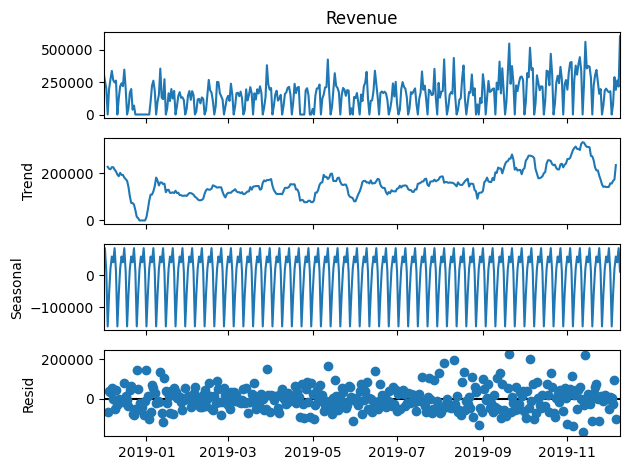

In [ ]:
df_P2['Date'] = pd.to_datetime(df_P2['Date'], errors='coerce')

# Check for any rows with invalid dates and remove them if necessary
df_P2 = df_P2.dropna(subset=['Date'])

# Calculate Revenue
df_P2['Revenue'] = df_P2['Price'] * df_P2['Quantity']

# Set the Date as the index
df_P2.set_index('Date', inplace=True)

# Resample daily and sum the revenues
df_daily = df_P2['Revenue'].resample('D').sum()

# Fill in missing dates with the mean revenue
mean_revenue = df_daily.mean()
df_daily_filled = df_daily.reindex(pd.date_range(start=df_daily.index.min(), end=df_daily.index.max()), fill_value=mean_revenue)

# Decompose the time series
decomposition = seasonal_decompose(df_daily_filled, model='additive')
decomposition.plot()
plt.show()

### <font color = red>Question 2.2. We will try to use time series model ARIMA for forecasting the future. you need to find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices based on the time from ”Jan-01-2019” to ”Nov-01-2019” (you might need to split the time series to train and test with grid search according to the M05B material).

In [ ]:
df_P2 = df.copy()
df_P2.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999


In [ ]:
df_P2['Date'] = pd.to_datetime(df_P2['Date'], errors='coerce')
df_P2 = df_P2.dropna(subset=['Date'])
df_P2 = df_P2.sort_values(by='Date')
df_P2['Revenue'] = df_P2['Price'] * df_P2['Quantity']
df_P2_daily = df_P2.groupby(df_P2['Date'].dt.date).agg({'Revenue': 'sum'}).reset_index()
df_P2_daily['Date'] = pd.to_datetime(df_P2_daily['Date'])
df_P2_daily.set_index('Date', inplace=True)
train_data = df_P2_daily['2019-01-01':'2019-10-31']
test_data = df_P2_daily['2019-11-01':'2019-11-30']
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

# Function to find the best ARIMA model
def evaluate_arima_model(train, test, pdq_combinations):
    best_mae = float("inf")
    best_order = None
    best_model = None

    for order in pdq_combinations:
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            mae = mean_absolute_error(test, predictions)

            if mae < best_mae:
                best_mae = mae
                best_order = order
                best_model = model_fit
        except:
            continue

    return best_model, best_order, best_mae

# Run the grid search
best_model, best_order, best_mae = evaluate_arima_model(train_data, test_data, pdq)

# Display the best ARIMA model and its performance
print(f"Best ARIMA model order: {best_order}")
print(f"Mean Absolute Error (MAE): {best_mae}")

Best ARIMA model order: (2, 1, 2)
Mean Absolute Error (MAE): 89631.39958674966


**Explanation:**

1. Loading & Preprocessing: The dataset is loaded, and we ensure that dates are parsed correctly. We aggregate revenue by day for simplicity.

2. ARIMA Model: We use the ARIMA function from statsmodels to fit the model and forecast.

3. Grid Search: By iterating over all combinations of (p, d, q) and calculating MAE, we find the best combination.

### <font color = red>Question 2.3. There are many deep learning time series forecasting methods, could you please explore those methods and write down the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using.

Exploring deep learning methods for time series forecasting can significantly enhance predictive accuracy, especially when dealing with complex, nonlinear data. Below is an overview of prominent deep learning architectures suitable for time series forecasting, along with the necessary data preprocessing and modeling steps.

**1. Recurrent Neural Networks (RNNs)**

RNNs are adept at handling sequential data by maintaining a memory of previous inputs, making them suitable for time series forecasting.

- Data Preprocessing:
- Normalization: Scale the data to a suitable range to facilitate efficient training.
- Windowing: Create overlapping windows of the time series data to capture temporal dependencies.

- Modeling Steps:
- Architecture Design: Choose the number of layers and units per layer based on the complexity of the data.
- Training: Use the preprocessed data to train the RNN, ensuring that the model learns the temporal patterns effectively.

**2. Long Short-Term Memory Networks (LSTMs)**

LSTMs are a type of RNN that can learn long-range dependencies, making them effective for time series data with longer temporal dependencies.

- Data Preprocessing:

- Sequence Padding: Ensure all sequences are of the same length by padding shorter sequences, allowing for efficient batch processing.
- Feature Engineering: Extract relevant features that may aid in forecasting.

- Modeling Steps:

- Define Model: Set up the LSTM architecture, specifying parameters such as the number of units and layers.
Compile and Train: Compile the model with an appropriate loss function and optimizer, and train it on the preprocessed data.

**3. Convolutional Neural Networks (CNNs)**

CNNs are traditionally used for image processing but have been adapted for time series forecasting by treating the time series data as a one-dimensional image.

- Data Preprocessing:

- Reshaping: Transform the time series data into a format suitable for CNN input, typically a 2D array with time steps and features.
- Normalization: Standardize the data to ensure consistent training.

- Modeling Steps:

- Design Architecture: Develop a CNN model with appropriate convolutional and pooling layers to capture temporal features.
Training: Train the model to learn spatial (temporal) patterns within the data.

**4. Transformer Models**

Transformers, especially those utilizing attention mechanisms, have shown promise in capturing complex temporal dependencies in time series data (arXiv).

- Data Preprocessing:

- Tokenization: Segment the time series into tokens if necessary, depending on the model's requirements.
- Embedding: Convert tokens into embeddings that represent their temporal position and value.

- Modeling Steps:

- Configure Model: Set up the transformer architecture, including the number of heads and layers.
Train: Train the model to learn attention patterns across the time series data.

**5. Generative Adversarial Networks (GANs)**

GANs can be employed to generate synthetic time series data, which can be useful for data augmentation or modeling complex data distributions.

- Data Preprocessing:

- Prepare Data: Organize the time series data to be suitable for both the generator and discriminator networks.

- Modeling Steps:

- Define Generator and Discriminator: Set up the architectures for both networks, ensuring they are balanced in capacity.
Training: Train the GAN using a balanced approach to ensure stable convergence.

**References:**

Ref [1]:A. B. O. F. R. A. T. (2022). An experimental review on deep learning architectures for time series forecasting. arXiv. https://arxiv.org/abs/2205.04208

Ref [2]: G. A. M. M. M. (2020). Deep learning for time series forecasting: Tutorial and literature review. arXiv. https://arxiv.org/abs/2001.06232

Ref [3]: Sharma, S., & Gupta, S. (2020). Time series forecasting (TSF) using various deep learning models. arXiv. https://arxiv.org/abs/2006.01739

### ***************************** End of Assignment (Part 1 and Part 2) ******************************